# Business Case Study: Audiobook app

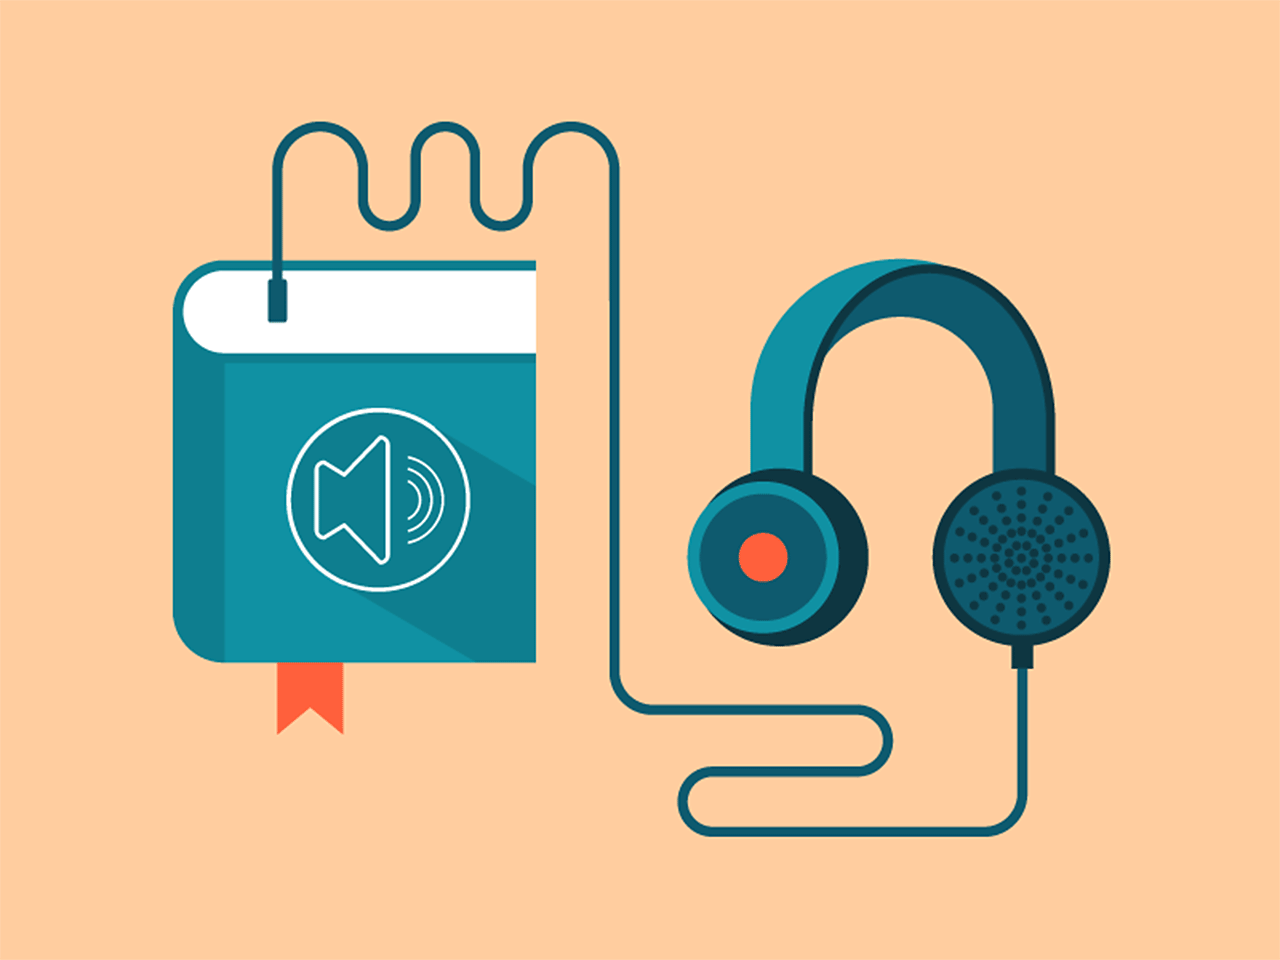

You are given data from an Audiobook app. Logically, it relates only to the audio versions of books.  We want to create a machine learning model based on our available data that can predict if a customer will buy again from the Audiobook company.

- The data is from an audiobook app, each customer in the database has make a purchase at least once.
- The main idea is that the company shouldn't spend there money targeting individuals who are unlikely to come back.
- If we focus on client who are more likely to convert again we'll get increase the sales and profitability figures.

The model must show us which are the most important metrics for a client to come back.

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import tensorflow as tf

%matplotlib inline
sns.set_style("whitegrid")

pd.set_option("display.max_columns", 80)
pd.set_option("display.max_rows", 80)
pd.set_option("display.float_format", "{:.2f}".format)

ModuleNotFoundError: No module named 'tensorflow'

In [19]:
data = pd.read_csv("audiobook_data_2.csv", index_col=0)
data.head()

,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
994,1620.0,1620,19.73,19.73,1,10.00,0.99,1603.8,5,92,0
1143,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,0,0
2059,2160.0,2160,5.33,5.33,0,8.91,0.00,0.0,0,388,0
2882,1620.0,1620,5.96,5.96,0,8.91,0.42,680.4,1,129,0
3342,2160.0,2160,5.33,5.33,0,8.91,0.22,475.2,0,361,0


In [20]:
#count = (data['Review']).value_counts()[0]
#print("Number of users who didnt give reviews are : ", count, " out of 14084")

# 1. Getting aquainted with the dataset

- `ÌD`: is like a name.

- `Book_length(mins)_overall`: is the sum of the lengths of purchases.

- `Book_length(mins)_avg`: is the sum of the lengths of purchases divided by the number of purchases. Notice we don't need the number of purchases column because we ca get it from `Book_length(mins)_overall` / `Book_length(mins)_avg`.

- `Price_overall` & `Price_avg`: Same as Book length, the price variable is almost always a good predictor.

- `Review`: is boolean. It shows if the customer left a review. If so, `Review10/10` saves the review left by the user. While most users don't left a review we fill the missing reviews by avrage review column.

- `Minutes_listened`: is a measure of engagement, the total of minutes the user listen to audiobooks.

- `Completion`: is the `Minutes_listened` / `Book_length(mins)_overall`.

- `Support_Request`: Shows the total number of support request (forgotten password to assistance).

- `Last_Visited_mins_Purchase_date`: the bigger the difference, the bigger sooner the engagement. If the value is 0, we are sure the customer has never accessed what he/she has bought.

The data was gathered from the audiobook app, the input data represents `2 years` worth of engagement. We are doing supervised learning so we need `target`. We took extra `6 month` to check if the user converted or not. 1 if the customer buys in the next 6 months, 0 if the customer didn't.

- `target`: 1 if the customer bought again in the last 6 months of data. 0 if the customer did not buy again.

# 2. Exploratory Data Analysis

In [21]:
data.describe()

,Book_length(mins)_overall,Book_length(mins)_avg,Price_overall,Price_avg,Review,Review10/10,Completion,Minutes_listened,Support_Request,Last_Visited_mins_Purchase_date,Target
count,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000,14084.000000
mean,1591.281685,1678.608634,7.103791,7.543805,0.160750,8.909795,0.125659,189.888983,0.070222,61.935033,0.158833
std,504.340663,654.838599,4.931673,5.560129,0.367313,0.643406,0.241206,371.084010,0.472157,88.207634,0.365533
min,216.000000,216.000000,3.860000,3.860000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1188.000000,1188.000000,5.330000,5.330000,0.000000,8.910000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1620.000000,1620.000000,5.950000,6.070000,0.000000,8.910000,0.000000,0.000000,0.000000,11.000000,0.000000
75%,2160.000000,2160.000000,8.000000,8.000000,0.000000,8.910000,0.130000,194.400000,0.000000,105.000000,0.000000
max,2160.000000,7020.000000,130.940000,130.940000,1.000000,10.000000,1.000000,2160.000000,30.000000,464.000000,1.000000


In [22]:
data.isnull().sum()

Book_length(mins)_overall          0
Book_length(mins)_avg              0
Price_overall                      0
Price_avg                          0
Review                             0
Review10/10                        0
Completion                         0
Minutes_listened                   0
Support_Request                    0
Last_Visited_mins_Purchase_date    0
Target                             0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14084 entries, 994 to 251
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Book_length(mins)_overall        14084 non-null  float64
 1   Book_length(mins)_avg            14084 non-null  int64  
 2   Price_overall                    14084 non-null  float64
 3   Price_avg                        14084 non-null  float64
 4   Review                           14084 non-null  int64  
 5   Review10/10                      14084 non-null  float64
 6   Completion                       14084 non-null  float64
 7   Minutes_listened                 14084 non-null  float64
 8   Support_Request                  14084 non-null  int64  
 9   Last_Visited_mins_Purchase_date  14084 non-null  int64  
 10  Target                           14084 non-null  int64  
dtypes: float64(6), int64(5)
memory usage: 1.3 MB


## `Book_length(mins)_overall` & `Book_length(mins)_avg`

- `Book_length(mins)_overall`: is the sum of the lengths of purchases.

- `Book_length(mins)_avg`: is the sum of the lengths of purchases divided by the number of purchases. Notice we don't need the number of purchases column because we ca get it from `Book_length(mins)_overall` / `Book_length(mins)_avg`.

In [24]:
data['Book_length(mins)_overall'].value_counts()

2160.000000    4712
1620.000000    4149
1188.000000    2851
648.000000      712
1080.000000     567
324.000000      300
540.000000      115
1404.000000     112
1890.000000     110
1674.000000      98
1134.000000      52
216.000000       51
1656.000000      27
1476.000000      23
1350.000000      21
756.000000       21
918.000000       15
1332.000000      14
1242.000000      13
864.000000       13
1296.000000      10
1152.000000       8
1116.000000       7
972.000000        7
486.000000        6
1377.000000       5
1368.000000       5
1512.000000       5
1224.000000       5
1044.000000       4
432.000000        4
594.000000        4
1008.000000       3
702.000000        3
684.000000        3
504.000000        2
576.000000        2
1161.000000       2
1269.000000       2
928.800000        1
1252.800000       1
1440.000000       1
1339.200000       1
990.000000        1
378.000000        1
945.000000        1
828.000000        1
1431.000000       1
720.000000        1
612.000000        1


In [25]:
def book_length(length):
    if length > 1200:
        return 1
    else:
        return 0
    
data['purchases_hour_>3h'] = data['Book_length(mins)_overall'].apply(book_length)

In [26]:
data['Book_length(mins)_avg'].apply(book_length).value_counts()

1    9480
0    4604
Name: Book_length(mins)_avg, dtype: int64

In [27]:
data['purchases_hour_>3h'].value_counts()

1    9317
0    4767
Name: purchases_hour_>3h, dtype: int64

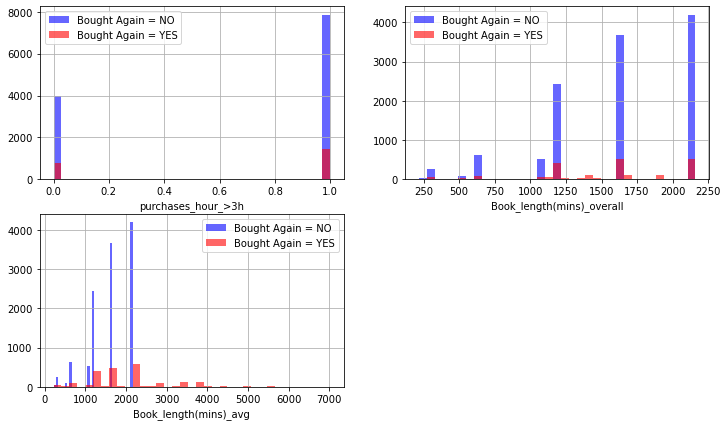

In [28]:
columns = ['purchases_hour_>3h', 'Book_length(mins)_overall', 'Book_length(mins)_avg']
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Price_overall` & `Price_avg`

- `Price_overall` & `Price_avg`: Same as Book length, the price variable is almost always a good predictor.

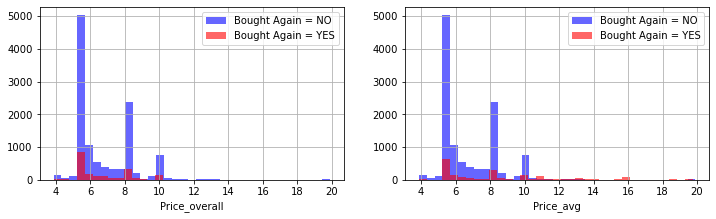

In [29]:
columns = ["Price_overall", "Price_avg"]
plt.figure(figsize=(12, 7))
df = data[(data.Price_overall < 20) & (data.Price_avg < 20)]

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    df[df["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    df[df["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Review` & `Review10/10`
- `Review`: is boolean. It shows if the customer left a review. If so, `Review10/10` saves the review left by the user. While most users don't left a review we fill the missing reviews by avrage review column.

In [30]:
print(data[data['Review'] == 0].Target.value_counts(normalize=True))
print(data[data['Review'] == 1].Target.value_counts(normalize=True))

0    0.843063
1    0.156937
Name: Target, dtype: float64
0    0.831272
1    0.168728
Name: Target, dtype: float64


In [31]:
data['Review10/10'].value_counts()

8.91     11616
10.00     1284
8.00       404
9.00       381
7.00       157
6.00       104
5.00        43
9.50        21
4.00        18
8.50        11
1.00        10
3.00         9
2.00         7
6.50         5
8.67         2
7.50         2
5.50         2
8.33         2
4.50         1
9.67         1
9.40         1
1.50         1
6.67         1
7.75         1
Name: Review10/10, dtype: int64

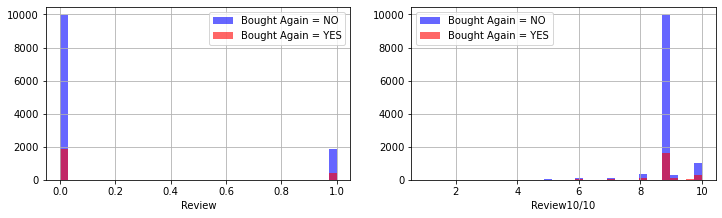

In [32]:
columns = ["Review", "Review10/10"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

## `Minutes_listened` & `Completion`
- `Minutes_listened`: is a measure of engagement, the total of minutes the user listen to audiobooks.
- `Completion`: is the `Minutes_listened` / `Book_length(mins)_overall`.

In [33]:
def listened_to_books(minutes):
    if minutes > 0.0:
        return 0
    else:
        return 1
data['listened_to_books'] = data.Minutes_listened.apply(listened_to_books)

In [34]:
def completion_state(minutes):
    if minutes > 0.5:
        return 1
    else:
        return 0
data['completion_state'] = data.Completion.apply(completion_state)

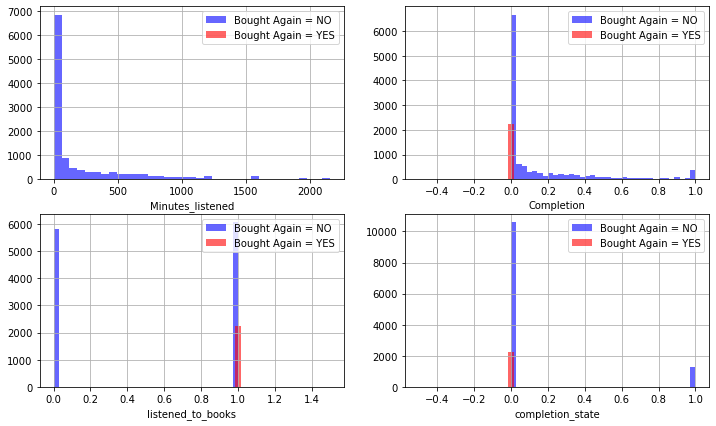

In [35]:
columns = ["Minutes_listened", "Completion", "listened_to_books", "completion_state"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [36]:
data.drop('Minutes_listened', axis=1, inplace=True)

## `Support_Request` & `Last_Visited_mins_Purchase_date`

- `Support_Request`: Shows the total number of support request (forgotten password to assistance).
- `Last_Visited_mins_Purchase_date`: the bigger the difference, the bigger sooner the engagement. If the value is 0, we are sure the customer has never accessed what he/she has bought.

In [37]:
def asked_for_request(request):
    if request == 0:
        return 0
    else:
        return 1
    
data["asked_for_request"] = data.Support_Request.apply(asked_for_request)

In [38]:
def acc_purchases(purchase):
    if purchase == 0:
        return 0
    else:
        return 1
data['acc_purchases'] = data.Last_Visited_mins_Purchase_date.apply(acc_purchases)

In [39]:
data.Last_Visited_mins_Purchase_date.value_counts()

0      5493
1       357
2       198
3       165
5       140
       ... 
369       1
367       1
339       1
379       1
363       1
Name: Last_Visited_mins_Purchase_date, Length: 371, dtype: int64

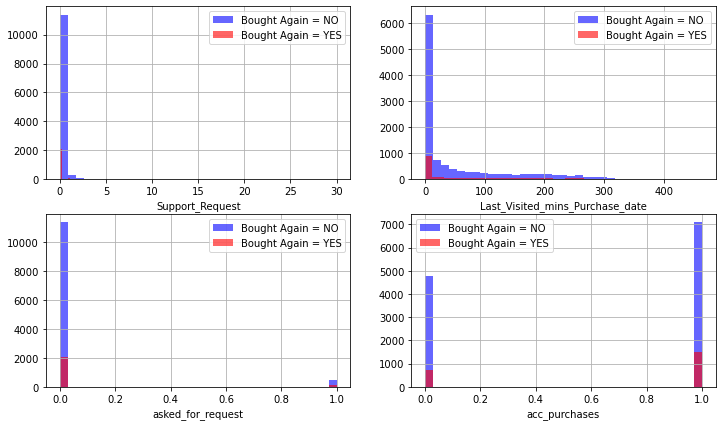

In [40]:
columns = ["Support_Request", "Last_Visited_mins_Purchase_date", "asked_for_request", "acc_purchases"]
plt.figure(figsize=(12, 7))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    data[data["Target"] == 0][column].hist(bins=35, color='blue', label='Bought Again = NO', alpha=0.6)
    data[data["Target"] == 1][column].hist(bins=35, color='red', label='Bought Again = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [41]:
data.drop('Support_Request', axis=1, inplace=True)

In [42]:
print(f"{data.Target.value_counts()}")
print(f"{data.Target.value_counts()[0] / data.Target.value_counts()[1]}")

0    11847
1     2237
Name: Target, dtype: int64
5.295932051855163


It is important to notice that our `target` variable is inbabalanced. We have only `2237` user who convert again in the `6 month` period. The data need to be balanced.

<AxesSubplot:>

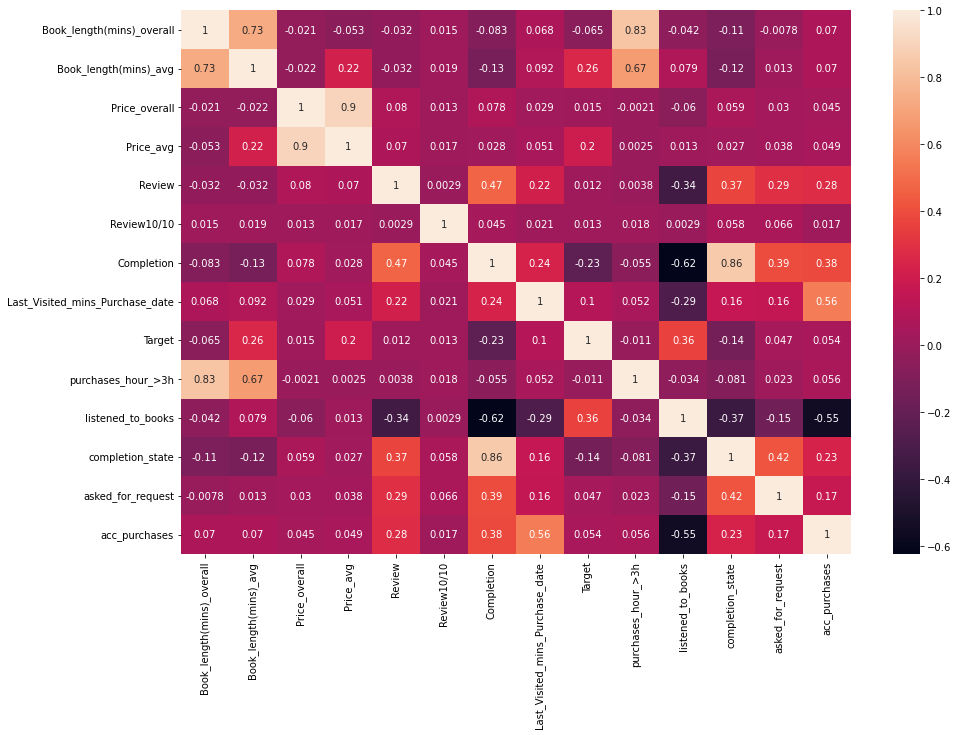

In [43]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True)

# 3. Data Pre-processing

Since we are dealing with real life data, we will need to preprocess it a bit. This is the relevant code which is not that hard but refers to data engineering more than machine learning.

- Balance the dataset. 
- Standardising 
- Shuffling 
- Splitting 

### Loading data


In [44]:
r_data = pd.read_csv("audiobook_data_2.csv", index_col=0)
X = r_data.loc[:, r_data.columns != 'Target']
y = r_data.loc[:, r_data.columns == 'Target']

raw_csv_data = np.loadtxt('audiobook_data_2.csv', delimiter = ',', skiprows=1)

unscaled_inputs_all = raw_csv_data[:,1:-1]

targets_all = raw_csv_data[:,-1]
raw_csv_data

array([[9.9400e+02, 1.6200e+03, 1.6200e+03, ..., 5.0000e+00, 9.2000e+01,
        0.0000e+00],
       [1.1430e+03, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.0590e+03, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 3.8800e+02,
        0.0000e+00],
       ...,
       [3.1134e+04, 2.1600e+03, 2.1600e+03, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [3.2832e+04, 1.6200e+03, 1.6200e+03, ..., 0.0000e+00, 9.0000e+01,
        0.0000e+00],
       [2.5100e+02, 1.6740e+03, 3.3480e+03, ..., 0.0000e+00, 0.0000e+00,
        1.0000e+00]])

### Balancing

In [45]:
num_one_targets = int(np.sum(targets_all))
zero_targets_counter = 0
indices_to_remove = []

for i in range(targets_all.shape[0]):
    if targets_all[i] ==0:
        zero_targets_counter += 1
        if zero_targets_counter > num_one_targets:
            indices_to_remove.append(i)
            
unscaled_inputs_equal_priors = np.delete(unscaled_inputs_all, indices_to_remove, axis = 0)
targets_equal_priors = np.delete (targets_all, indices_to_remove, axis=0)

### Standardise

In [46]:
scaled_inputs = preprocessing.scale(unscaled_inputs_equal_priors)

### Shuffle the data

In [47]:

shuffled_indices = np.arange(scaled_inputs.shape[0])

np.random.shuffle(shuffled_indices)
shuffled_inputs = scaled_inputs[shuffled_indices]
shuffled_targets = targets_equal_priors[shuffled_indices]

print(shuffled_inputs.shape)
print(shuffled_targets.shape)

(4474, 10)
(4474,)


### Split the dataset into train and test

In [48]:


samples_count = shuffled_inputs.shape[0]

train_samples_count = int(0.8*samples_count)
validation_samples_count = int(0.1*samples_count)
test_samples_count = samples_count - train_samples_count - validation_samples_count

train_inputs = shuffled_inputs[:train_samples_count]
train_targets = shuffled_targets[:train_samples_count]

validation_inputs = shuffled_inputs[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = shuffled_targets[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = shuffled_inputs[train_samples_count+validation_samples_count:]
test_targets = shuffled_targets[train_samples_count+validation_samples_count:]

print(np.sum(train_targets), train_samples_count, np.sum(train_targets) / train_samples_count)
print(np.sum(validation_targets), validation_samples_count, np.sum(validation_targets) / validation_samples_count)
print(np.sum(test_targets), test_samples_count, np.sum(test_targets) / test_samples_count)

1786.0 3579 0.4990220732048058
204.0 447 0.4563758389261745
247.0 448 0.5513392857142857


# 4. Model Building

## 4. 1. Logistic Regression 

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(shuffled_inputs, shuffled_targets, test_size=0.3, random_state=0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(3131, 10)
(1343, 10)
(3131,)


In [50]:
y_train.shape

(3131,)

In [51]:

y_train.shape
sum1 = 0
sum0 = 0
for i in range(y_train.shape[0]):
    if(y_train[i]==1):
        sum1+=1
    else:
        sum0+=1

zeros = (sum0 / y_train.shape[0])
ones = (sum1 / y_train.shape[0])
print(sum1)
print(sum0)
print(f"Doesn't purchase again users Rate: {zeros * 100:.2f}%")
print(f"Purchase again users Rate: {ones * 100 :.2f}%")

1581
1550
Doesn't purchase again users Rate: 49.50%
Purchase again users Rate: 50.50%


##### .values convert dataframe into ndArray | .flatten converts ndArray into 1D

In [100]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [101]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


### Accuracy of Logistic regression is 80.00%

## Confusion matrix

[[378 291]
 [ 24 650]]


<AxesSubplot:>

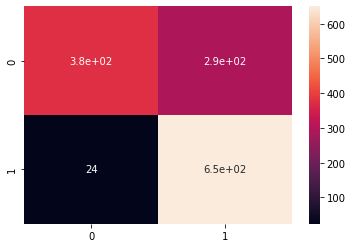

In [19]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
sns.heatmap(confusion_matrix,annot=True)


### The result is telling us that we have 474+597 = '1071' correct predictions and 81+191 = '272' incorrect predictions.

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.57      0.71       669
         1.0       0.69      0.96      0.80       674

    accuracy                           0.77      1343
   macro avg       0.82      0.76      0.76      1343
weighted avg       0.82      0.77      0.76      1343



#### The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

#### The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

#### The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.
#### The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

#### The support is the number of occurrences of each class in y_test.

## 4. 2 Support Vector Machine 

In [103]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)


SVC()

In [22]:
y_predSVM = svm_clf.predict(X_test)
print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(svm_clf.score(X_test, y_test)))

Accuracy of Support Vector Machine classifier on test set: 0.77


### SVC Hyperparameter Tuning with GridSearchCV

In [79]:
print("SVC Hyperparameter tuning")
#Tuning hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [ 1, 100, 1000],
              'gamma': [0.1, 0.001, 0.0001],
              'kernel': ['rbf','poly','sigmoid']}
 
svm_clf = GridSearchCV(SVC(), param_grid, verbose = 2)
 
# fitting the model for grid search
svm_clf.fit(X_train, y_train)

# print best parameter after tuning
print(svm_clf.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(svm_clf.best_estimator_)


SVC Hyperparameter tuning


NameError: name 'SVC' is not defined

In [58]:
y_predSVM = svm_clf.predict(X_test)
print('Accuracy of Support vector machine on training data is {}'.format(grid.score(svm_clf, y_train)*100))
print('Accuracy of Support vector machine on testing data is {}'.format(grid.score(svm_clf, y_test)*100))

Accuracy of Support vector machine on training data is 83.23219418716064
Accuracy of Support vector machine on testing data is 80.11913626209977


### Visualizing Data using PCA (Principal Component Analysis) & Calculating accuracy on that

Accuracy of Support Vector Machine classifier on test set: 0.66


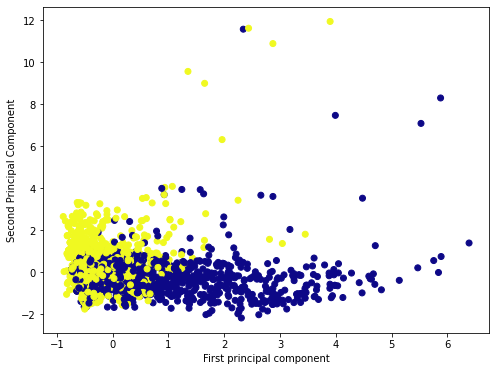

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=3)
scaler = StandardScaler()
pca_X_train = pca.fit_transform(X_train)
pca_X_test = pca.transform(X_test)
pca_X_train = scaler.fit_transform(pca_X_train)
pca_X_test = scaler.transform(pca_X_test)
plt.figure(figsize=(8,6))
plt.scatter(pca_X_train[:,0],pca_X_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
svm_clf = SVC()
svm_clf.fit(pca_X_train[:,:2], y_train)
print('Accuracy of Support Vector Machine classifier on test set: {:.2f}'.format(svm_clf.score(pca_X_test[:,:2], y_test)))

C:\Users\Darshpreet Singh\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


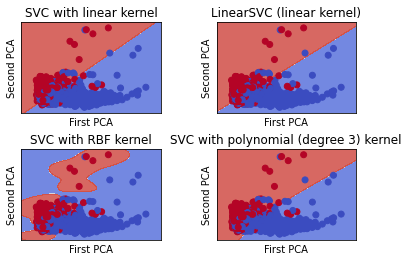

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

X = pca_X_train[:, :2]  # we only take the first two features. We could
                      # avoid this ugly slicing by using a two-dim dataset
y = y_train

h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('First PCA')
    plt.ylabel('Second PCA')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()

### Confusion matrix

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predSVM)
print(confusion_matrix)
sns.heatmap(confusion_matrix,annot=True)


#### Correct predictions    : 553  + 470 = 1023
#### Incorrect predictions :  208+    112    =  320

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm_clf))

## 4. 3 Decision tree

### Visualizing accuracy by tuning parameters

Accuracy of Decision tree classifier on training data is: 84.45
Highest Accuracy of Decision tree classifier on test data is: 81.31


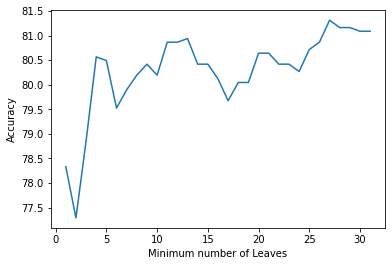

In [77]:
from sklearn.tree import DecisionTreeClassifier

def decision_tree_classfier(leaves):
    DTclf_model = DecisionTreeClassifier(criterion="gini", random_state=1, min_samples_leaf=leaves)   
    DTclf_model.fit(X_train,y_train)
    y_predDT = DTclf_model.predict(X_test)
    score = DTclf_model.score(X_test, y_test)
    return score
accuracy = []
min_number_of_leaves = []
# Tuning parameters
for leaves in range(1,32):
    min_number_of_leaves.append(leaves)
    score = decision_tree_classfier(leaves)
    accuracy.append(score*100)

max_value = max(accuracy) #Return the max value of the list.
max_index = accuracy.index(max_value) #Find the index of the max value.
leave_for_highest_score = min_number_of_leaves[max_index]
score = decision_tree_classfies(leave_for_highest_score)


DTclf_model = DecisionTreeClassifier(criterion="gini", random_state=1, min_samples_leaf=leave_for_highest_score)   
DTclf_model.fit(X_train,y_train)
training_score = DTclf_model.score(X_train, y_train)

print('Accuracy of Decision tree classifier on training data is: {:.2f}'.format(training_score*100))
print('Highest Accuracy of Decision tree classifier on test data is: {:.2f}'.format(score*100))
plt.xlabel("Minimum number of Leaves")
plt.ylabel("Accuracy")
plt.plot(min_number_of_leaves, accuracy)
plt.show()

### Training Decision Tree Classifier by tuning parameter

In [108]:
params = {'max_leaf_nodes': list(range(2, 400)), 'min_samples_split': [2, 3, 4]}
DTclf_model = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
DTclf_model.fit(X_train, y_train)

# print best parameter after tuning
print(DTclf_model.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(DTclf_model.best_estimator_)

Fitting 3 folds for each of 1194 candidates, totalling 3582 fits
{'max_leaf_nodes': 82, 'min_samples_split': 2}
DecisionTreeClassifier(max_leaf_nodes=82, random_state=42)


In [109]:
print('Accuracy of Decision Tree on training data is {}'.format(DTclf_model.score(X_train, y_train)*100))
print('Accuracy of Decision Tree on testing data is {}'.format(DTclf_model.score(X_test, y_test)*100))

Accuracy of Decision Tree on training data is 87.92717981475568
Accuracy of Decision Tree on testing data is 80.11913626209977


### Plotting Decision Tree

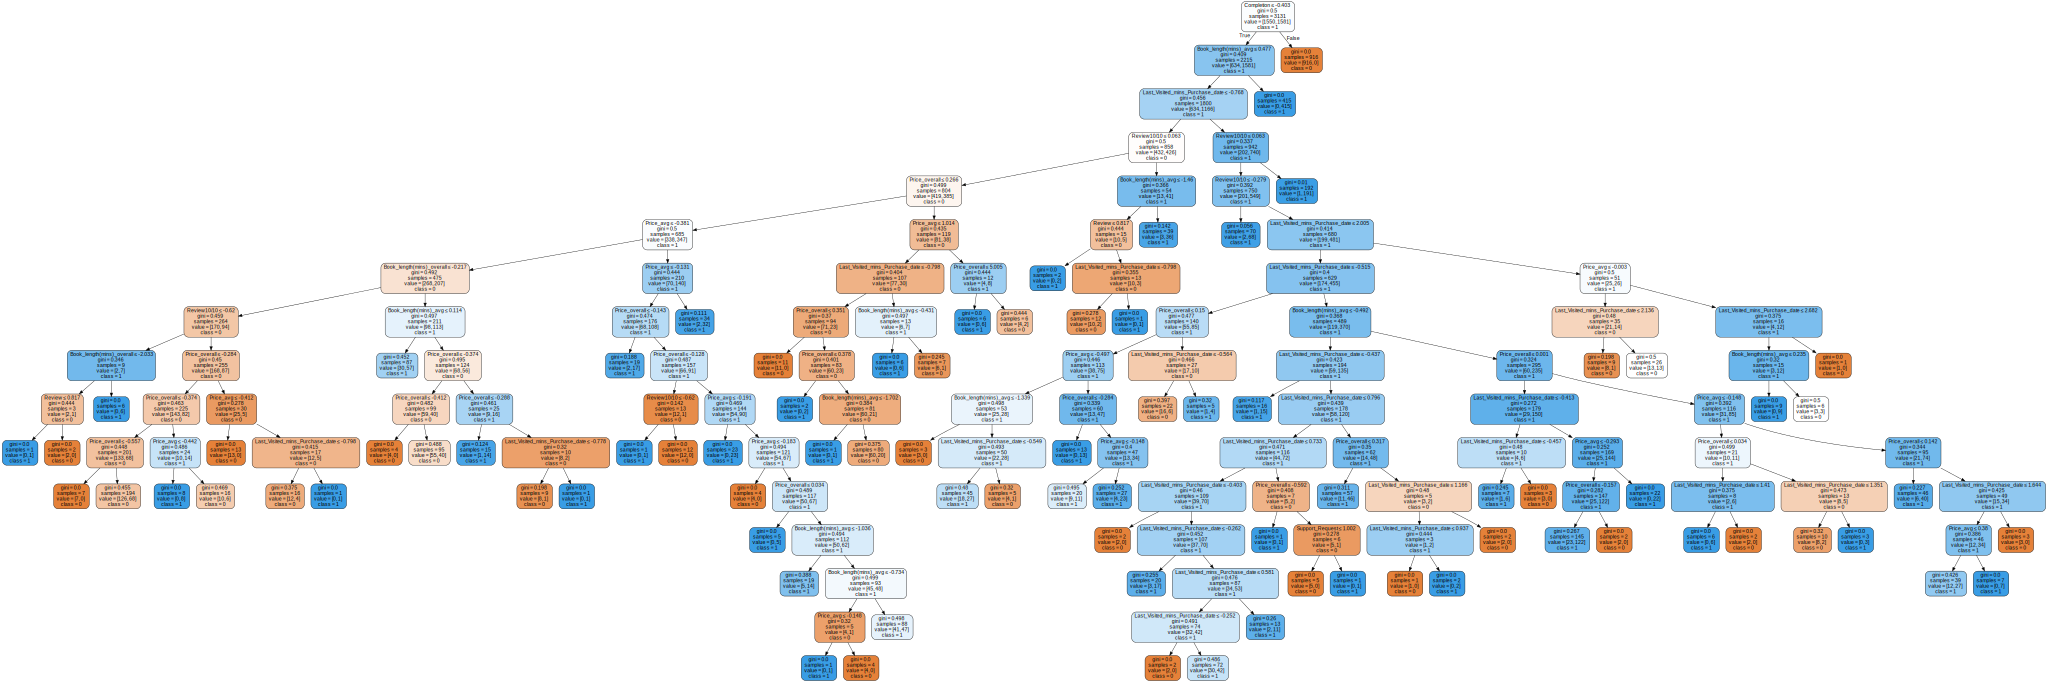

In [75]:
from sklearn import tree
import graphviz

# tree.plot_tree(DTclf_model, filled = True)
class_names = [ '0' , '1']
feature_names = list(X.columns.values)
# To plot the decision tree using graphviz
dot_data = tree.export_graphviz(DTclf_model.best_estimator_, 
                  feature_names=feature_names,  
                  class_names=class_names,  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph

### Accuracy of Decision tree classification is 78.00%

### Confusion matrix

[[539 148]
 [119 537]]


<AxesSubplot:>

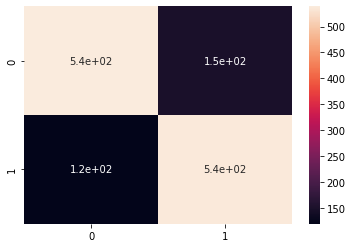

In [76]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

y_predDT = DTclf_model.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_predDT)
print(confusion_matrix)
sns.heatmap(confusion_matrix,annot=True)

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80       687
         1.0       0.78      0.82      0.80       656

    accuracy                           0.80      1343
   macro avg       0.80      0.80      0.80      1343
weighted avg       0.80      0.80      0.80      1343



## 4.3.1 XG Boost 

In [84]:
from xgboost import XGBClassifier

In [88]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42
)
xgb_clf =  GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=2
)
xgb_clf.fit(X_train, y_train)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


C:\Users\Darshpreet Singh\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:09:46] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scal

In [90]:
y_predXG = xgb_clf.predict(X_test)
print('Accuracy of Extreme Gradient Boosting classifier on training set: {:.2f}'.format(xgb_clf.score(X_train, y_train)))
print('Accuracy of Extreme Gradient Boosting classifier on test set: {:.2f}'.format(xgb_clf.score(X_test, y_test)))

Accuracy of Extreme Gradient Boosting classifier on training set: 0.96
Accuracy of Extreme Gradient Boosting classifier on test set: 0.92


### Accuracy of Decision tree classification is 92.00%

### Confusion matrix

[[536 151]
 [102 554]]


<AxesSubplot:>

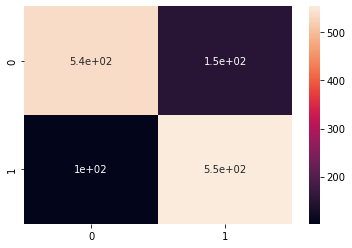

In [91]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predXG)
print(confusion_matrix)
sns.heatmap(confusion_matrix,annot=True)

In [92]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predXG))

              precision    recall  f1-score   support

         0.0       0.84      0.78      0.81       687
         1.0       0.79      0.84      0.81       656

    accuracy                           0.81      1343
   macro avg       0.81      0.81      0.81      1343
weighted avg       0.81      0.81      0.81      1343



## 4. 4 Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
def random_forest_classfier(n_estimators=100, max_depth=None,max_leaf_nodes=None,min_samples_split=2 ):
    rf_clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, max_leaf_nodes=max_leaf_nodes,min_samples_split=min_samples_split)  
    rf_clf.fit(X_train,y_train)
    score = rf_clf.score(X_test, y_test)
    return score
def graph_plot(parameter):
    accuracy = []
    parameter_array = []
    # Tuning parameters
    if parameter =='max_depth':
        for value in range(1,32):
            parameter_array.append(value)
            score = random_forest_classfier(max_depth=value)
            accuracy.append(score)
    elif parameter =='n_estimators':
        for value in range(10,200):
            parameter_array.append(value)
            score = random_forest_classfier(n_estimators=value)
            accuracy.append(score)
    elif parameter =='max_leaf_nodes':
        for value in range(2,200):
            parameter_array.append(value)
            score = random_forest_classfier(max_leaf_nodes=value)
            accuracy.append(score)
    elif parameter =='min_samples_split':
        for value in range(2,50):
            parameter_array.append(value)
            score = random_forest_classfier(min_samples_split=value)
            accuracy.append(score)
    
    score = max(accuracy) #Return the max value of the list.
    print('Accuracy of Decision tree classifier on test set: {:.2f}'.format(score*100))
    if parameter == 'max_depth':
        plt.xlabel("max_depth")
    elif parameter == 'n_estimators':
        plt.xlabel("n_estimators")
    elif parameter == 'max_leaf_nodes':
        plt.xlabel("max_leaf_nodes")
    elif parameter == 'min_samples_split':
        plt.xlabel("min_samples_split")        
    plt.ylabel("Accuracy")
    plt.plot(parameter_array, accuracy)
    plt.show()


Accuracy of Decision tree classifier on test set: 83.92


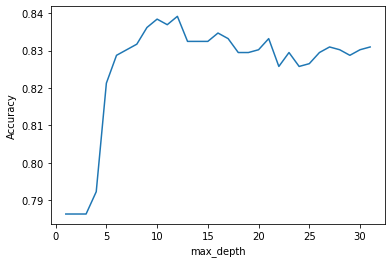

In [81]:

graph_plot('max_depth')

Accuracy of Decision tree classifier on test set: 83.47


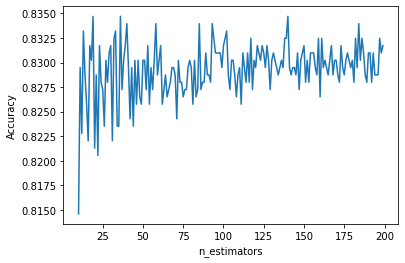

In [82]:

graph_plot('n_estimators')


Accuracy of Decision tree classifier on test set: 83.99


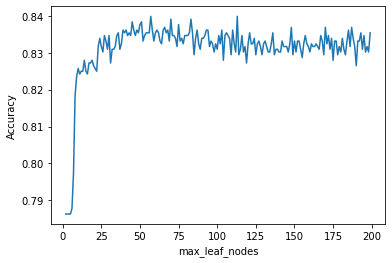

In [91]:
graph_plot('max_leaf_nodes')

Accuracy of Decision tree classifier on test set: 83.84


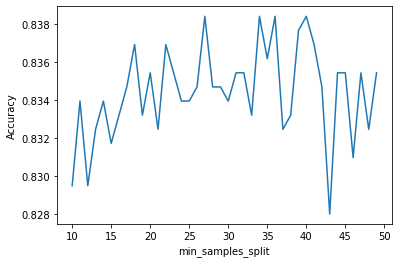

In [89]:

graph_plot('min_samples_split')

In [82]:
from sklearn.ensemble import RandomForestClassifier

param_grid = { 
    'n_estimators': [200, 700],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 5, verbose = 2)
rf_clf.fit(X_train, y_train)

# print best parameter after tuning
print(rf_clf.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(rf_clf.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ................max_features=auto, n_estimators=200; total time=   1.0s
[CV] END ................max_features=auto, n_estimators=200; total time=   1.0s
[CV] END ................max_features=auto, n_estimators=200; total time=   1.0s
[CV] END ................max_features=auto, n_estimators=200; total time=   1.0s
[CV] END ................max_features=auto, n_estimators=200; total time=   1.0s
[CV] END ................max_features=auto, n_estimators=700; total time=   3.5s
[CV] END ................max_features=auto, n_estimators=700; total time=   3.4s
[CV] END ................max_features=auto, n_estimators=700; total time=   3.5s
[CV] END ................max_features=auto, n_estimators=700; total time=   3.9s
[CV] END ................max_features=auto, n_estimators=700; total time=   4.1s
[CV] END ................max_features=sqrt, n_estimators=200; total time=   1.1s
[CV] END ................max_features=sqrt, n_est

In [83]:
y_predRF = rf_clf.predict(X_test)
print('Accuracy of Random Forest classifier on training set: {:.2f}'.format(rf_clf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_clf.score(X_test, y_test)))

Accuracy of Random Forest classifier on training set: 0.93
Accuracy of Random Forest classifier on test set: 0.81


### Accuracy of Random Forest is 81.00%

In [54]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predRF)
print(confusion_matrix)
sns.heatmap(confusion_matrix,annot=True)


[[551 114]
 [130 548]]


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

         0.0       0.81      0.83      0.82       665
         1.0       0.83      0.81      0.82       678

    accuracy                           0.82      1343
   macro avg       0.82      0.82      0.82      1343
weighted avg       0.82      0.82      0.82      1343



## 4.5 K Nearest neighbour classification

In [94]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [95]:
y_predKNN = knn_clf.predict(X_test)
print('Accuracy of KNN classifier on test set: {:.2f}'.format(knn_clf.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.75


### Accuracy of KNN Classification is 76.00%

[[467 220]
 [110 546]]


<AxesSubplot:>

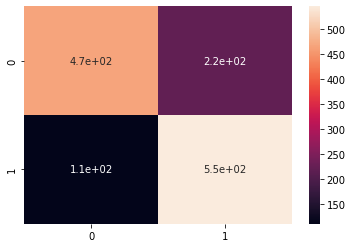

In [96]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_predKNN)
print(confusion_matrix)
sns.heatmap(confusion_matrix,annot=True)


In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predKNN))

              precision    recall  f1-score   support

         0.0       0.81      0.68      0.74       687
         1.0       0.71      0.83      0.77       656

    accuracy                           0.75      1343
   macro avg       0.76      0.76      0.75      1343
weighted avg       0.76      0.75      0.75      1343



# 5. Comparing Machine Learning Models

In [104]:
from sklearn.metrics import roc_auc_score

ml_models = {
    'Logistic Regression': logreg, 
    'Random Forest': rf_clf, 
    'XGboost': xgb_clf,
    'Decision Tree':DTclf_model,
    'KNN': knn_clf,
    'SVM': svm_clf
}

LOGISTIC REGRESSION roc_auc_score: 0.791
RANDOM FOREST roc_auc_score: 0.807
XGBOOST roc_auc_score: 0.812
DECISION TREE roc_auc_score: 0.814
KNN roc_auc_score: 0.756
SVM roc_auc_score: 0.778


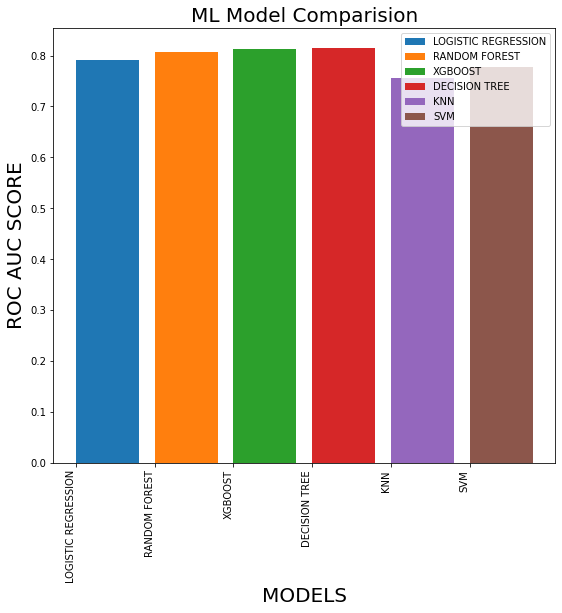

In [105]:
plt.figure(figsize=(9,8))

for model in ml_models:
    print(f"{model.upper()} roc_auc_score: {roc_auc_score(y_test, ml_models[model].predict(X_test)):.3f}")
    plt.bar(model.upper(),roc_auc_score(y_test, ml_models[model].predict(X_test)),label=model.upper(),align="edge")
plt.title("ML Model Comparision",fontsize=20)
plt.xlabel("MODELS",fontsize=20)
plt.xticks(rotation=90,ha='right')
plt.ylabel("ROC AUC SCORE",fontsize=20)
plt.legend()
plt.show()
